In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np
import scipy

In [2]:
def make_scatterplot_full(uncertainty, outcomes):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].scatter(uncertainty, outcomes.get("continuity_mean"))
    axs[0].set_title("continuity_mean")
    axs[0].set_xlabel(uncertainty.name)
    axs[0].set_ylabel('continuity_mean')
    
    axs[1].scatter(uncertainty, outcomes.get("connectivity_mean"))
    axs[1].set_title("connectivity_mean")
    axs[1].set_xlabel(uncertainty.name)
    axs[1].set_ylabel('connectivity_mean')
    
    axs[2].scatter(uncertainty, outcomes.get("node_frequency_mean"))
    axs[2].set_title("node_frequency_mean")
    axs[2].set_xlabel(uncertainty.name)
    axs[2].set_ylabel('node_frequency_mean')
    

# Read in data

In [3]:
highway_east_OA_experiments, highway_east_OA_outcomes = load_results('data/highway_east/results_high_way_east_OA.gz')
highway_east_RP_experiments, highway_east_RP_outcomes = load_results('data/highway_east/results_high_way_east_RP.gz')
highway_east_TA_experiments, highway_east_TA_outcomes = load_results('data/highway_east/results_high_way_east_TA.gz')
highway_east_HS_experiments, highway_east_HS_outcomes = load_results('data/highway_east/results_high_way_east_HS.gz')

In [4]:
highway_east_OA_outcomes.keys()

dict_keys(['continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'node_frequency_mean', 'node_frequency_var'])

In [5]:
outcomes_change = highway_east_OA_outcomes
highway_east_OA_outcomes = {}
highway_east_OA_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
highway_east_OA_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
highway_east_OA_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
highway_east_OA_outcomes["continuity_var"] = outcomes_change['continuity_vars']
highway_east_OA_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
highway_east_OA_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

In [6]:
outcomes_change = highway_east_RP_outcomes
highway_east_RP_outcomes = {}
highway_east_RP_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
highway_east_RP_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
highway_east_RP_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
highway_east_RP_outcomes["continuity_var"] = outcomes_change['continuity_vars']
highway_east_RP_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
highway_east_RP_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

In [7]:
outcomes_change = highway_east_TA_outcomes
highway_east_TA_outcomes = {}
highway_east_TA_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
highway_east_TA_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
highway_east_TA_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
highway_east_TA_outcomes["continuity_var"] = outcomes_change['continuity_vars']
highway_east_TA_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
highway_east_TA_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

In [8]:
outcomes_change = highway_east_HS_outcomes
highway_east_HS_outcomes = {}
highway_east_HS_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
highway_east_HS_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
highway_east_HS_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
highway_east_HS_outcomes["continuity_var"] = outcomes_change['continuity_vars']
highway_east_HS_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
highway_east_HS_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

# Analysis

Correlations

In [9]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'connectivity_mean', 'node_frequency_mean'])
p_mat = pd.DataFrame()


for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["TA", value] = scipy.stats.kendalltau(highway_east_TA_experiments["TA"], pd.DataFrame(highway_east_TA_outcomes)[value])[0]
    p_mat.at["TA", value] = scipy.stats.kendalltau(highway_east_TA_experiments["TA"], pd.DataFrame(highway_east_TA_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["OA", value] = scipy.stats.kendalltau(highway_east_OA_experiments["OA"], pd.DataFrame(highway_east_OA_outcomes)[value])[0]
    p_mat.at["OA", value] = scipy.stats.kendalltau(highway_east_OA_experiments["OA"], pd.DataFrame(highway_east_OA_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["HS", value] = scipy.stats.kendalltau(highway_east_HS_experiments["HS"], pd.DataFrame(highway_east_HS_outcomes)[value])[0]
    p_mat.at["HS", value] = scipy.stats.kendalltau(highway_east_HS_experiments["HS"], pd.DataFrame(highway_east_HS_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["RP", value] = scipy.stats.kendalltau(highway_east_RP_experiments["RP"], pd.DataFrame(highway_east_RP_outcomes)[value])[0]
    p_mat.at["RP", value] = scipy.stats.kendalltau(highway_east_RP_experiments["RP"], pd.DataFrame(highway_east_RP_outcomes)[value])[1]

In [10]:
corr_mat

,continuity_mean,connectivity_mean,node_frequency_mean
TA,0.869692,0.739412,0.806044
OA,0.795615,0.3499,0.689745
HS,NaN,NaN,NaN
RP,-0.829718,-0.014644,0.004379


In [11]:
p_mat

,continuity_mean,connectivity_mean,node_frequency_mean
TA,8.728121e-32,1.918883e-23,1.541919e-27
OA,1.544588e-27,1.582709e-06,4.242020e-21
HS,NaN,NaN,NaN
RP,1.688270e-29,8.359205e-01,9.525238e-01


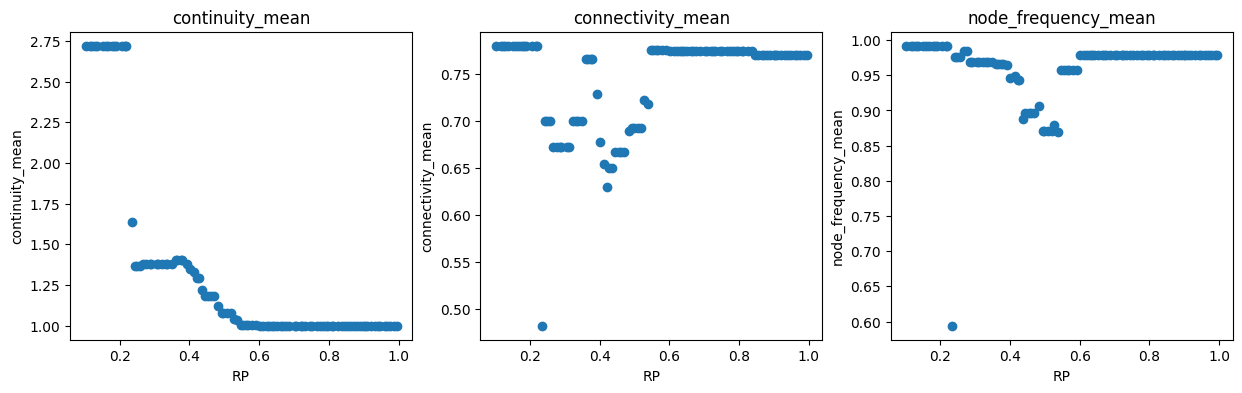

In [12]:
make_scatterplot_full(highway_east_RP_experiments["RP"], highway_east_RP_outcomes)

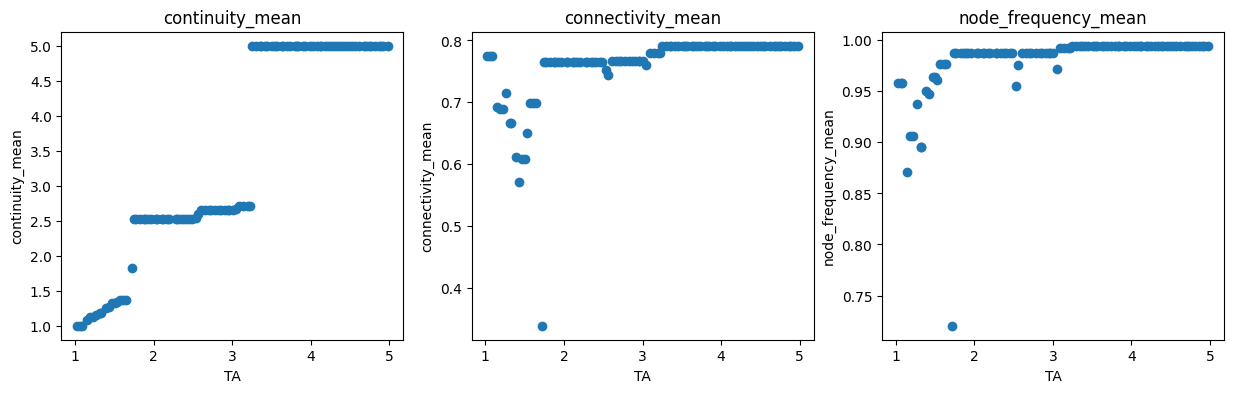

In [13]:
make_scatterplot_full(highway_east_TA_experiments["TA"], highway_east_TA_outcomes)

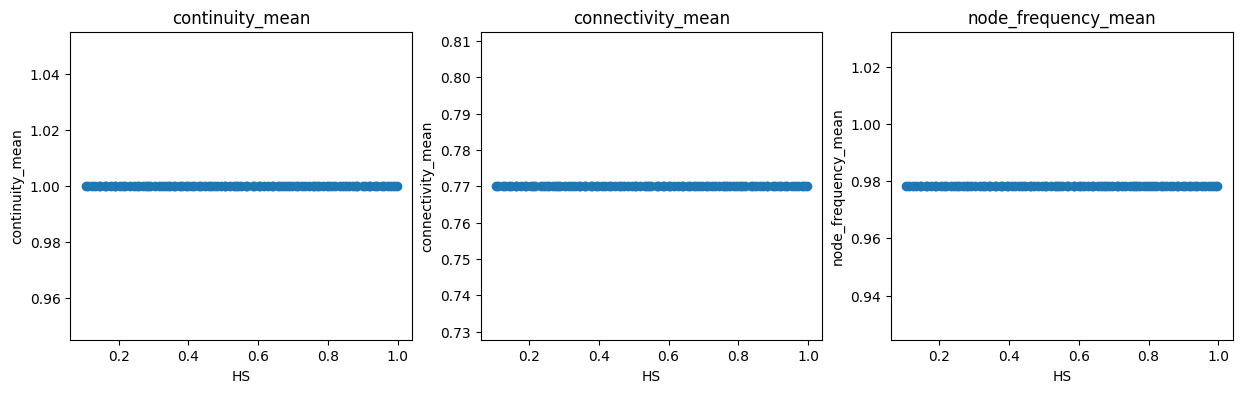

In [14]:
make_scatterplot_full(highway_east_HS_experiments["HS"], highway_east_HS_outcomes)

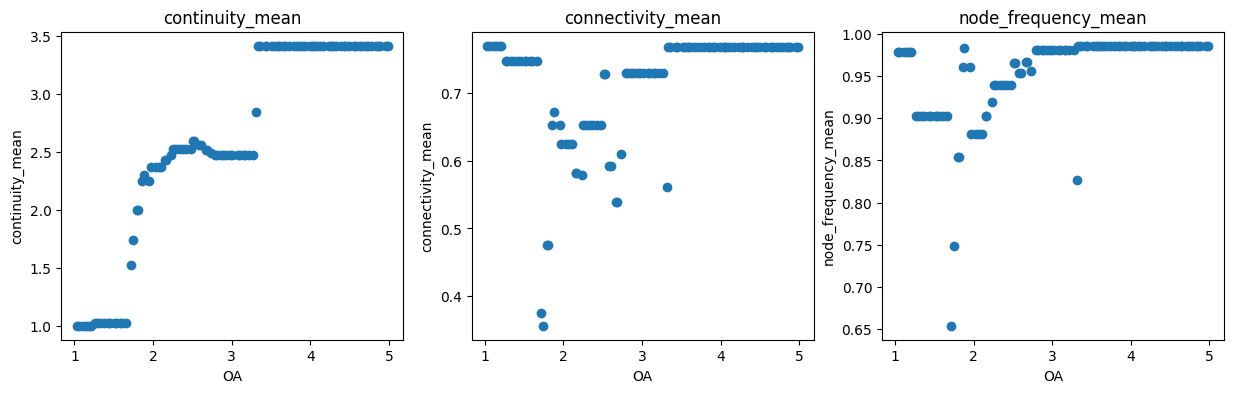

In [15]:
make_scatterplot_full(highway_east_OA_experiments["OA"], highway_east_OA_outcomes)